In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
digits = load_digits()
X = digits['data']
y = digits['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
def get_random_weight(incoming_conn, outgoing_conn):
    epsilon_init = 0.12
    weight = np.random.rand(outgoing_conn, incoming_conn + 1) * 2 * epsilon_init - epsilon_init
    return weight

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def sigmoid_gradient(z):
    sigmoid_ = sigmoid(z)
    gradient = sigmoid_ * (1 - sigmoid_)
    return gradient

In [17]:
def get_predictions(X, theta1, theta2):
    m = X.shape[0]
    A1 = np.hstack((np.ones((m, 1)), X))
    Z2 = A1 @ theta1.T
    A2 = np.c_[np.ones((Z2.shape[0], 1)), sigmoid(Z2)]
    Z3 = A2 @ theta2.T
    A3 = H = sigmoid(Z3)
    return H

In [18]:
def vectorize_targets(y, num_labels):
    m = y.shape[0]
    I = np.eye(10)
    Y = np.zeros((m, 10))
    
    for i in range(m):
        Y[i, :] = I[y[i], :]
        
    return Y

In [19]:
def cost_function(X, Y, theta1, theta2, num_labels, lambda_):
    m = X.shape[0]
    H = get_predictions(X, theta1, theta2)
    penalty = (lambda_ / (2 * m)) * (np.sum(theta1[:, 1:]**2) + np.sum(theta2[:, 1:]**2))
    cost = np.sum( (-Y * np.log(H)) - ((1 - Y) * np.log(1 - H)) ) / m
    cost += penalty
    return cost

In [20]:
def get_gradients(X, Y, theta1, theta2, lambda_):
    m = X.shape[0]
    A1 = np.hstack((np.ones((m, 1)), X))
    Z2 = A1 @ theta1.T
    A2 = np.c_[np.ones((Z2.shape[0], 1)), sigmoid(Z2)]
    Z3 = A2 @ theta2.T
    A3 = H = sigmoid(Z3)

    sigma3 = H - Y
    sigma2 = (sigma3 @ theta2) * sigmoid_gradient(np.c_[np.ones(Z2.shape[0]), Z2])
    sigma2 = sigma2[:, 1:]

    delta1 = sigma2.transpose() @ A1
    delta2 = sigma3.transpose() @ A2

    theta1_grad = (delta1 / m) + (lambda_ / m) *  np.c_[np.zeros(theta1.shape[0]), theta1[:, 1:]]
    theta2_grad = (delta2 / m) + (lambda_ / m) *  np.c_[np.zeros(theta2.shape[0]), theta2[:, 1:]]
    return theta1_grad, theta2_grad

In [21]:
theta1 = get_random_weight(X.shape[1], 120)
theta2 = get_random_weight(120, 10)
Y = vectorize_targets(y_train)
alpha = 0.03
cost_history = []

for i in range(500):
    cost = cost_function(X_train, Y, theta1, theta2, 1)
    cost_history.append(cost)
    theta1_grad, theta2_grad = get_gradients(X_train, Y, theta1, theta2, 1)
    theta1 = theta1 - alpha * theta1_grad
    theta2 = theta2 - alpha * theta2_grad

In [22]:
predictions = np.argmax(get_predictions(X_test, theta1, theta2), axis=1)

In [23]:
print("Percentage of right predictions: {}".format((100 * y_test.shape[0] - sum(predictions == y_test))
                                                   / y_test.shape[0]))

Percentage of right predictions: 99.05111111111111


Text(0, 0.5, 'Cost')

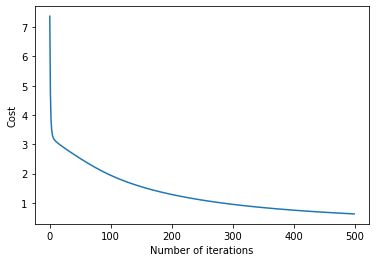

In [24]:
plt.plot(cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [25]:
cost_history[0], cost_history[-1]

(7.367954498259889, 0.6258276420925579)

In [37]:
# !pip3 install Pillow --user

In [123]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/Users/fatihtasdemir/Downloads/MintyPaper.png')
# convert image to numpy array
data = asarray(image)

In [135]:
data[0:, 0:8, :1].reshape(64)

array([  0,  12,  32,  32,  32,  32,  12,   0,   0,  60, 159, 159, 159,
       195,  96,   0,   0,   0,   0,   0,   2, 107,  96,   0,   0,   0,
         0, 195, 224, 237, 235, 223,   0,   0,  73,  15,  56, 139,   0,
         0,   0,   0,   0,   1, 223,   0,   0,   0,   0,   0,   0, 140,
        84,   0,   0,   0,   0,   0,   0,  28,   0,   0,   0,   0],
      dtype=uint8)

In [136]:
get_predictions(np.array([data[0:, 0:8, :1].reshape(64)]), theta1, theta2)[0].argmax()

7

<Figure size 432x288 with 0 Axes>

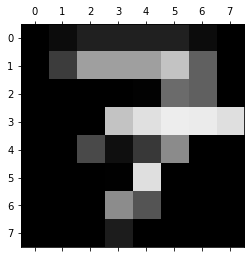

In [137]:
plt.gray() #doctest: +SKIP
plt.matshow(data) #doctest: +SKIP

In [139]:
np.array([data[0:, 0:8, :1].reshape(64)]).shape

(1, 64)

In [140]:
data[0:, 0:8, :1].shape

(8, 8, 1)